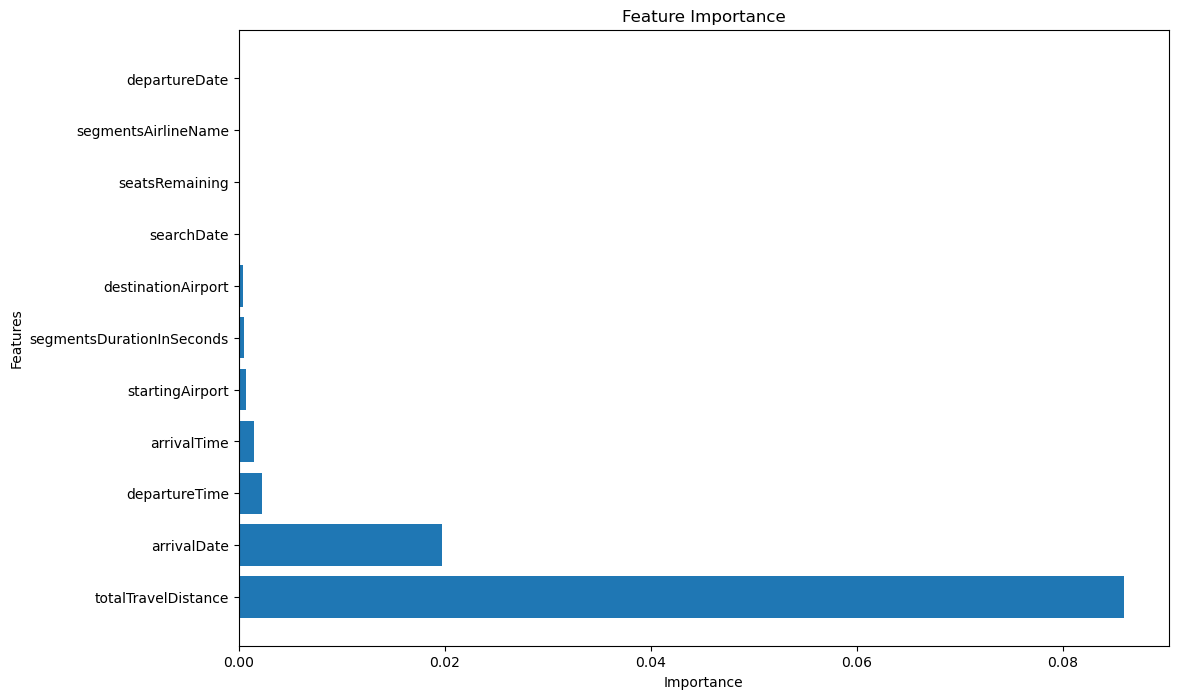

[ 0.00000000e+00 -3.41428410e-05 -2.05600472e-05 -0.00000000e+00
  8.59550749e-02  0.00000000e+00  4.94358444e-04  1.50994981e-03
 -2.30749733e-03 -1.97698505e-02 -0.00000000e+00]
least important

Index(['searchDate', 'seatsRemaining', 'segmentsAirlineName', 'departureDate'], dtype='object')

most important

Index(['startingAirport', 'destinationAirport', 'totalTravelDistance',
       'segmentsDurationInSeconds', 'arrivalTime', 'departureTime',
       'arrivalDate'],
      dtype='object')

Original data shape: (646485, 11)
Filtered data shape: (646485, 7)


In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt  # Import Matplotlib
from sklearn.preprocessing import StandardScaler



# Load the dataset from a CSV file in your Downloads folder
file_path = "newestest_itineraries4.csv"  # Replace with the correct file path
data = pd.read_csv(file_path)

# Extract the features (X) and the target variable (y)
X = data.iloc[:, 1:]  # Exclude the first column (target) for features
y = data.iloc[:, 0]  # Use the first column as the target variable

# Create a Lasso regression model
lasso = Lasso(alpha=50)  # Adjust alpha as needed

# Fit the model to the data
lasso.fit(X, y)

# Get the feature coefficients (importances)
feature_importances = lasso.coef_


abs_importances = np.abs(feature_importances)

abs_importances = [importance*20 if importance<0.0004 else importance for importance in abs_importances]


# Create a DataFrame to hold feature names and their normalized importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': abs_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Identify the least important features (zero coefficients)
least_important_features = [i for i, importance in enumerate(feature_importances) if importance == 0]
most_important_features = [i for i, importance in enumerate(feature_importances) if importance != 0]

print(feature_importances)

# Remove the least important features from the dataset
print("least important\n")
print(X.columns[least_important_features][:])
print("\nmost important\n")
print(X.columns[most_important_features][:])
X_filtered = X.drop(X.columns[least_important_features], axis=1)

# Print the original and filtered data shapes
print("\nOriginal data shape:", X.shape)
print("Filtered data shape:", X_filtered.shape)
